This is the companion Jupyter Notebook of Chapter 5, Variational Quantum Eigensolver (VQE) Algorithm, of the book titled:
"Quantum Chemistry and Computing for the Curious: Illustrated with Python and Qiskit® code" and with ISBN-13: 978-1803243900.
Copyright © 2022, Keeper L. Sharkey and Alain Chancé.

The following MIT license only applies to the code, and not to the text and images. The authors are not granting a license to replicate or reuse the text and images in the companion Jupyter notebook.

# MIT License

Copyright (c) 2022 Packt

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.


# 5. Variational Quantum Eigensolver (VQE) Algorithm


# Technical requirements
A companion Jupyter notebook for this chapter can be downloaded from GitHub at https://github.com/PacktPublishing/Quantum-Chemistry-and-Computing-for-the-Curious, which has been tested in the Google Colab environment, which is free and runs entirely in the cloud, and in the IBM Quantum Lab environment. Please refer to Appendix B – Leveraging Jupyter Notebooks in the Cloud, for more information. The companion Jupyter notebook automatically installs the following list of libraries:
*   Numerical Python (NumPy) [NumPy], an open-source Python library that is used in almost every field of science and engineering.
*   Qiskit [Qiskit], an open-source SDK for working with quantum computers at the level of pulses, circuits, and application modules.
*   Qiskit visualization support to enable the use of visualizations and Jupyter notebooks.
*   Qiskit Nature [Qiskit_Nature] [Qiskit_Nat_0], a unique platform to bridge the gap between natural sciences and quantum simulations.
*   Python-based Simulations of Chemistry Framework (PySCF) [PySCF], an open-source collection of electronic structure modules powered by Python.
*   Quantum Toolbox in Python (QuTiP) [QuTiP], a general framework for solving quantum mechanics problems such as systems composed of few-level quantum systems and harmonic oscillators.
*   Atomic Simulation Environment (ASE) [ASE_0], a set of tools and Python modules for setting up, manipulating, running, visualizing, and analyzing atomistic simulations. The code is freely available under the GNU LGPL license.
*   PyQMC [PyQMC], a Python module that implements real-space quantum Monte Carlo techniques. It is primarily meant to interoperate with PySCF.
*   h5py [h5py] package, a Pythonic interface to the HDF5 binary data format.
*   SciPy, [SciPy], a Python module that contains a large number of probability distributions, summary and frequency statistics, correlation functions and statistical tests, masked statistics, kernel density estimation, quasi-Monte Carlo functionality, and more.

# Summary of updates V2.1
This Jupyter notebook has been adapted to work with Qiskit Nature v0.6 and qiskit-terra 0.24.0.

Please refer to the following documentation:
*   Quantum Instance Migration Guide, https://qiskit.org/documentation/migration_guides/qi_migration.html
*   The QubitConverter Migration Guide, https://qiskit.org/ecosystem/nature/migration/0.6_c_qubit_converter.html
*   Transition from the PauliSumOp class and its widespread use to the qiskit.quantum_info module and its SparsePauliOp class, https://qiskit.org/ecosystem/nature/migration/0.6_c_qubit_converter.html#paulisumop-vs-sparsepauliop
*   Use a UCC-like ansatz with a VQE
https://qiskit.org/ecosystem/nature/howtos/vqe_ucc.html
*   Opflow migration, https://qisk.it/opflow_migration


## Updates in import statements
### Use a UCC-like ansatz with a VQE

Previously
```
from qiskit_nature.second_q.algorithms import VQEUCCFactory
from qiskit_nature.second_q.circuit.library import UCCSD
```
New
```
#from qiskit_nature.second_q.algorithms import VQEUCCFactory
from qiskit_nature.second_q.circuit.library import UCCSD, HartreeFock
```
### Quantum Instance Migration
Previously
```
from qiskit.utils import QuantumInstance
```
New
```
#from qiskit.utils import QuantumInstance

# Import Sampler which the do_qpe() function uses as argument to PhaseEstimation()
# pe = PhaseEstimation(num_evaluation_qubits=nqubits, sampler = Sampler())
# and which the run_qpe() function uses as argument to HamiltonianPhaseEstimation()
# qpe = HamiltonianPhaseEstimation(n_ancillae, sampler=Sampler())

from qiskit.primitives import Sampler
```
### Opflow migration
Previously
```
from qiskit.opflow import StateFn, PauliExpectation,  CircuitSampler, PauliTrotterEvolution
```
New
```
# The class ``qiskit.opflow.evolutions.pauli_trotter_evolution.PauliTrotterEvolution`` is deprecated 
# as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. 
# For code migration guidelines, visit https://qisk.it/opflow_migration.
#from qiskit.opflow import StateFn, PauliExpectation,  CircuitSampler, PauliTrotterEvolution
```

### Transition from the PauliSumOp class and its widespread use to the qiskit.quantum_info module and its SparsePauliOp class
New statement
```
from qiskit_nature import settings
```

## Updates in code
### Updates pertaining to the fermion_to_qubit() function
Previously as shown in Summary of updates V2

New
```
def fermion_to_qubit(problem, second_q_op, mapper_name, truncate=20, two_qubit_reduction=False, z2symmetry_reduction=None, show=True): 
# Electronic Structure Problems with v0.5
# https://qiskit.org/documentation/nature/migration/00b_Electronic_structure_with_v0.5.html
# https://qiskit.org/documentation/nature/stubs/qiskit_nature.second_q.mappers.QubitConverter.html#qubitconverter
# https://qiskit.org/ecosystem/nature/migration/0.6_c_qubit_converter.html
  if show:
    print("Qubit Hamiltonian operator")
    print("{} transformation ". format(mapper_name))

  match mapper_name:
    case "Jordan-Wigner":
      mapper = JordanWignerMapper()
    case "Parity":
      mapper = ParityMapper(num_particles=problem.num_particles)
    case "Bravyi-Kitaev":
      mapper = BravyiKitaevMapper()
  
  qubit_op = mapper.map(second_q_op)
  
  if z2symmetry_reduction != None:
    tapered_mapper = problem.get_tapered_mapper(mapper)
    qubit_op = tapered_mapper.map(second_q_op)
    
  n_items = len(qubit_op)
  if show:
    print("Number of items in the Pauli list:", n_items)
    if n_items <= truncate:
      print(qubit_op)
    else:
      print(qubit_op[0:truncate])
  return qubit_op, mapper
```

### Transition from the PauliSumOp class and its widespread use to the qiskit.quantum_info module and its SparsePauliOp class
PauliSumOp is deprecated as of version 0.6.0 and support for them will be removed no sooner than 3 months after the release. Instead, use SparsePauliOp. You can switch to SparsePauliOp immediately, by setting `qiskit_nature.settings.use_pauli_sum_op` to `False`.

New statement
```
settings.use_pauli_sum_op = False
```

### Updates pertaining to the do_qpe() function in section 5.1.3. Quantum Phase Estimation (QPE)
We use the PhaseEstimation's sampler argument instead of the quantum_instance which is is deprecated as of qiskit-terra 0.24.0.
https://qiskit.org/documentation/stubs/qiskit.algorithms.PhaseEstimation.html

Previously
```
  pe = PhaseEstimation(num_evaluation_qubits=nqubits, quantum_instance=quantum_instance)
```
New
```
  pe = PhaseEstimation(num_evaluation_qubits=nqubits, sampler=Sampler())
```
Previously
```
quantum_instance = QuantumInstance(backend = Aer.get_backend('aer_simulator_statevector'))
theta = 1/2 + 1/4 + 1/8
```
New
```
theta = 1/2 + 1/4 + 1/8
```
### Updates pertaining to the VQE solver in section 5.1.4. Description of the VQE algorithm
Previously
```
quantum_instance = QuantumInstance(backend = Aer.get_backend('aer_simulator_statevector'))
```
New: deleted statement quantum instance

Previously
```
vqe_ucc_solver = VQEUCCFactory(Estimator(), UCCSD(), SLSQP())
```
New 
```
#vqe_ucc_solver = VQEUCCFactory(Estimator(), UCCSD(), SLSQP())
#vqe_ucc_solver is now defined in solve_ground_state()
```
In solve_ground_state()
```
    #https://qiskit.org/ecosystem/nature/howtos/vqe_ucc.html
    if name_solver == 'UCCSD ansatz':
      ansatz = UCCSD(
        problem.num_spatial_orbitals,
        problem.num_particles,
        mapper,
        initial_state=HartreeFock(problem.num_spatial_orbitals,problem.num_particles,mapper),
        )
      solver = VQE(Estimator(), ansatz, SLSQP())
```
### Updates pertaining to the function qnspsa in section 5.2.1. Hydrogen molecule
Previously
```
fidelity = QNSPSA.get_fidelity(ansatz, quantum_instance, expectation=PauliExpectation())
```
New
qiskit.algorithms.optimizers.QNSPSA.get_fidelity,
https://qiskit.org/documentation/stubs/qiskit.algorithms.optimizers.QNSPSA.get_fidelity.html
```
#fidelity = QNSPSA.get_fidelity(ansatz, quantum_instance, expectation=PauliExpectation())
fidelity = QNSPSA.get_fidelity(ansatz, sampler=Sampler())
```
### Updates pertaining to the run_qpe() function in section 5.2. Example chemical calculations
Previously
```
def run_qpe(qubit_op, n_ancillae=3, num_time_slices = 1, show=True):

  evolution = PauliTrotterEvolution('trotter', reps=num_time_slices)

  qpe = HamiltonianPhaseEstimation(n_ancillae, quantum_instance=quantum_instance)
  state_preparation = None
  result = qpe.estimate(qubit_op, state_preparation, evolution=evolution)

  if show:
    eigv = result.most_likely_eigenvalue
    print("QPE computed electronic ground state energy (Hartree): {}".format(eigv))
  
  return eigv
```
New

Running the Hamiltonian phase estimation algorithm with evolution=None so that the default PauliTrotterEvolution is used.
https://qiskit.org/documentation/stubs/qiskit.algorithms.HamiltonianPhaseEstimation.html
https://qiskit.org/documentation/stubs/qiskit.algorithms.HamiltonianPhaseEstimation.estimate.html#qiskit.algorithms.HamiltonianPhaseEstimation.estimate

Returning the real part of the eigenvalue
```
def run_qpe(qubit_op, n_ancillae=3, num_time_slices=1, show=True):
  
  qpe = HamiltonianPhaseEstimation(n_ancillae, sampler=Sampler())
  state_preparation = None
  result = qpe.estimate(qubit_op, state_preparation, evolution=None)

  if show:
    eigv = np.real(result.most_likely_eigenvalue)
    print("QPE computed electronic ground state energy (Hartree): {}".format(eigv))
  
  return eigv

```
### Updates pertaining to section 5.2.1. Hydrogen molecule
Previously
```
H2_fermionic_hamiltonian, H2_num_particles, H2_num_spin_orbitals, H2_qubit_op, H2_qubit_converter, H2_ground_state = \
                  solve_ground_state(H2_info_dict, mapper ="Parity",
                  two_qubit_reduction=True, z2symmetry_reduction=None, 
                  name_solver = 'Unitary Coupled Cluster (UCC) factory ansatz', solver = vqe_ucc_solver)
```
New
```
H2_fermionic_hamiltonian, H2_num_particles, H2_num_spin_orbitals, H2_qubit_op, H2_qubit_converter, H2_ground_state = \
                  solve_ground_state(H2_info_dict, mapper_name="Parity",
                  two_qubit_reduction=True, z2symmetry_reduction=None, 
                  name_solver = 'UCCSD ansatz')
```

# Summary of updates V2
## Purpose
This Jupyter notebook has been adapted to work with Qiskit Nature v0.5 and the new Qiskit Runtime primitives. 

Please refer to the following documentation:

Electronic Structure Problems with v0.5, https://qiskit.org/documentation/nature/migration/00b_Electronic_structure_with_v0.5.html

Leveraging Qiskit Runtime
https://qiskit.org/documentation/nature/tutorials/07_leveraging_qiskit_runtime.html

## New install command
Install qiskit.utils with the following command (V2):
```
pip install qiskit.utils
```
## Updates in import statements
Previously
```
from qiskit_nature.drivers.second_quantization import ElectronicStructureDriverType, ElectronicStructureMoleculeDriver
from qiskit_nature.problems.second_quantization import ElectronicStructureProblem
from qiskit_nature.mappers.second_quantization import ParityMapper, JordanWignerMapper, BravyiKitaevMapper
from qiskit_nature.converters.second_quantization import QubitConverter

from qiskit_nature.operators.second_quantization import FermionicOp
from qiskit_nature.circuit.library.initial_states import HartreeFock
from qiskit_nature.circuit.library.ansatzes import UCCSD
```
New
```
# Electronic Structure Problems with v0.5
# https://qiskit.org/documentation/nature/migration/00b_Electronic_structure_with_v0.5.html
from qiskit_nature.second_q.formats.molecule_info import MoleculeInfo
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.mappers import QubitConverter
from qiskit_nature.second_q.mappers import ParityMapper, JordanWignerMapper, BravyiKitaevMapper
from qiskit_nature.second_q.properties import ParticleNumber
from qiskit_nature.second_q.transformers import ActiveSpaceTransformer, FreezeCoreTransformer
```

Previously
```
from qiskit_nature.algorithms import VQEUCCFactory, GroundStateEigensolver, NumPyMinimumEigensolverFactory, BOPESSampler
from qiskit.algorithms import NumPyMinimumEigensolver, VQE, HamiltonianPhaseEstimation, PhaseEstimation
```

New
```
# https://qiskit.org/documentation/nature/tutorials/03_ground_state_solvers.html
from qiskit.algorithms import HamiltonianPhaseEstimation, PhaseEstimation

# https://qiskit.org/documentation/nature/tutorials/03_ground_state_solvers.html
from qiskit.primitives import Estimator

from qiskit.algorithms.optimizers import SLSQP, SPSA, QNSPSA
from qiskit_nature.second_q.algorithms import VQEUCCFactory
from qiskit_nature.second_q.circuit.library import UCCSD

from qiskit.algorithms.minimum_eigensolvers import NumPyMinimumEigensolver, VQE
from qiskit_nature.second_q.algorithms.ground_state_solvers import GroundStateEigensolver
```
## Updates in code

### New function bopes for sampling the potential energy surface
The BOPESSampler() previously used will soon be removed, https://github.com/Qiskit/qiskit-nature/issues/750 .
The MoleculeInfo has become a pure data container and no longer supports degrees of freedom.

The new function bopes() computes the new coordinates of the atoms in the pair given as input and then calls the solve_ground_state() function with an info_dict that contains the new coordinates.
```
def bopes(info_dict, mapper, num_electrons, num_spatial_orbitals, two_qubit_reduction, z2symmetry_reduction,
          name_solver, perturbation_steps, qubit_converter, solver, show=True):
```

### Updates to leverage Qiskit Runtime primitives

Previously
```
vqe_tl_solver = VQE(ansatz = tl_circuit,
                     quantum_instance = QuantumInstance(Aer.get_backend('aer_simulator_statevector')))
```
New
```
estimator = Estimator()
optimizer = SPSA(maxiter=100)
vqe_tl_solver = VQE(estimator, tl_circuit, optimizer)
```

Previously
```
vqe_ucc_solver = VQEUCCFactory(quantum_instance, ansatz = tl_circuit)
```
New
```
vqe_ucc_solver = VQEUCCFactory(Estimator(), UCCSD(), SLSQP())
```


### Updates pertaining to the new MoleculeInfo data structure
The MoleculeInfo has become a pure data container and no longer supports degrees of freedom.
This version uses a new dictionary to set up both the MoleculeInfo and the PySCF molecule data structure.

Previously
```
run_PySCF(molecule, pyqmc=True, show=True):
```
New
```
run_PySCF(info_dict, pyqmc=True, show=True):
```

Previously
```
H2_molecule = Molecule(geometry=[['H', [0., 0., 0.]],['H', [0., 0., 0.735]]],charge=0, multiplicity=1)
```
New
```
H2_atoms = ["H", "H"]
H2_coords = [(0.0, 0.0, 0.0), (0.0, 0.0, 0.735)]
H2_charge = 0
H2_multiplicity = 1
H2_atom_pair=(1, 0)
H2_info_dict={'atoms':H2_atoms, 'coords':H2_coords, 'charge':H2_charge, 'multiplicity':H2_multiplicity, 'atom_pair':H2_atom_pair}

H2_moleculeinfo = MoleculeInfo(H2_atoms, H2_coords, charge=H2_charge, multiplicity=H2_multiplicity)
```

Previously
```
LiH_molecule = Molecule(geometry=[['Li', [0., 0., 0.]], ['H', [0., 0., 1.5474]]], charge=0, multiplicity=1)
```

New
```
LiH_atoms = ["Li", "H"]
LiH_coords = [(0.0, 0.0, 0.0), (0.0, 0.0, 1.5474)]
LiH_charge = 0
LiH_multiplicity = 1
LiH_atom_pair=(1,0)
LiH_info_dict={'atoms':LiH_atoms, 'coords':LiH_coords, 'charge':LiH_charge, 'multiplicity':LiH_multiplicity, 'atom_pair':LiH_atom_pair}

LiH_moleculeinfo = MoleculeInfo(LiH_atoms, LiH_coords, charge=LiH_charge, multiplicity=LiH_multiplicity)
```

Previously
```
macromolecule = Molecule(geometry=
   [['O', [1.1280, 0.2091, 0.0000]],
   ['N', [-1.1878, 0.1791, 0.0000]],
   ['C', [0.0598, -0.3882, 0.0000]],
   ['H', [-1.3085, 1.1864, 0.0001]],
   ['H', [-2.0305, -0.3861, -0.0001]],
   ['H', [-0.0014, -1.4883, -0.0001]],
   ['C', [-0.1805, 1.3955, 0.0000]]],
   charge=0, multiplicity=1,
   degrees_of_freedom=[specific_molecular_variation])
```
New
```
M_atoms = ["O", "N","C","H","H","H","C"]
M_coords = [(1.1280, 0.2091, 0.0000), 
                    (-1.1878, 0.1791, 0.0000),
                    (0.0598, -0.3882, 0.0000),
                    (-1.3085, 1.1864, 0.0001),
                    (-2.0305, -0.3861, -0.0001),
                    (-0.0014, -1.4883, -0.0001),
                    (-0.1805, 1.3955, 0.0000)]
M_charge = 0
M_multiplicity = 1
M_atom_pair=(6, 1)
M_info_dict={'atoms':M_atoms, 'coords':M_coords, 'charge':M_charge, 'multiplicity':M_multiplicity, 'atom_pair':M_atom_pair}

macromoleculeinfo = MoleculeInfo(M_atoms, M_coords, charge=M_charge, multiplicity=M_multiplicity)
```


### Updates pertaining to the get_particle_number() function
Previously
```
def get_particle_number(problem, show=True):
  particle_number = problem.grouped_property_transformed.get_property("ParticleNumber")
  num_particles = (particle_number.num_alpha, particle_number.num_beta)
  num_spin_orbitals = particle_number.num_spin_orbitals
  if show:
    print("Number of alpha electrons: {}".format(particle_number.num_alpha))
    print("Number of beta electrons: {}".format(particle_number.num_beta))
    print("Number of spin orbitals: {}".format(num_spin_orbitals))
  return particle_number
```
New
```
def get_particle_number(problem, show=True):
  
  # https://qiskit.org/documentation/nature/stubs/qiskit_nature.second_q.problems.ElectronicStructureProblem.num_spin_orbitals.html
  num_spin_orbitals = problem.num_spin_orbitals
  num_particles = problem.num_particles
  
  if show:
    print("Number of particles: {}".format(num_particles))
    print("Number of spin orbitals: {}".format(num_spin_orbitals))
    
  return num_particles, num_spin_orbitals
```
### Updates pertaining to the fermion_to_qubit() function
Now second_q_op is used as a replacement for second_q_op[0]

Previously
```
def fermion_to_qubit(f_op, second_q_op, mapper, truncate=20, two_qubit_reduction=False, z2symmetry_reduction=None, show=True): 
  if show:
    print("Qubit Hamiltonian operator")
  dmap = {"Jordan-Wigner": JordanWignerMapper(), "Parity": ParityMapper(), "Bravyi-Kitaev": BravyiKitaevMapper()}
  qubit_op = None
  qubit_converter = None
  for k, v in dmap.items():
    if k == mapper:
      if show:
        print("{} transformation ". format(mapper))
      qubit_converter = QubitConverter(v, two_qubit_reduction=two_qubit_reduction, z2symmetry_reduction=z2symmetry_reduction)
      if two_qubit_reduction:
        qubit_op = qubit_converter.convert(second_q_op[0], num_particles=f_op.num_particles)
      else:
        qubit_op = qubit_converter.convert(second_q_op[0])
      n_items = len(qubit_op)
      if show:
        print("Number of items in the Pauli list:", n_items)
        if n_items <= truncate:
          print(qubit_op)
        else:
          print(qubit_op[0:truncate])
  return qubit_op, qubit_converter
```
New
```
def fermion_to_qubit(problem, second_q_op, mapper, truncate=20, two_qubit_reduction=False, z2symmetry_reduction=None, show=True): 
# Electronic Structure Problems with v0.5
# https://qiskit.org/documentation/nature/migration/00b_Electronic_structure_with_v0.5.html
# https://qiskit.org/documentation/nature/stubs/qiskit_nature.second_q.mappers.QubitConverter.html#qubitconverter
  if show:
    print("Qubit Hamiltonian operator")
  dmap = {"Jordan-Wigner": JordanWignerMapper(), "Parity": ParityMapper(), "Bravyi-Kitaev": BravyiKitaevMapper()}
  qubit_op = None
  qubit_converter = None
  for k, v in dmap.items():
    if k == mapper:
      if show:
        print("{} transformation ". format(mapper))
      qubit_converter = QubitConverter(v, two_qubit_reduction=two_qubit_reduction, z2symmetry_reduction=z2symmetry_reduction)
      # QubitConverter.convert
      # https://qiskit.org/documentation/nature/stubs/qiskit_nature.second_q.mappers.QubitConverter.convert.html
      if two_qubit_reduction:
        qubit_op = qubit_converter.convert(second_q_op, num_particles=problem.num_particles)
      else:
        qubit_op = qubit_converter.convert(second_q_op)
      n_items = len(qubit_op)
      if show:
        print("Number of items in the Pauli list:", n_items)
        if n_items <= truncate:
          print(qubit_op)
        else:
          print(qubit_op[0:truncate])
  return qubit_op, qubit_converter
```

### Updates pertaining to the solve_ground_state() function
The molecule parameter has been replaced by the new info_dict dictionary.

Previously
```
def solve_ground_state(
    molecule,
    mapper ="Parity",
    num_electrons=None,
    num_molecular_orbitals=None,
    transformers=None,
    two_qubit_reduction=False,
    z2symmetry_reduction = "Auto",
    name_solver='NumPy exact solver',
    solver=NumPyMinimumEigensolver(),
    plot_bopes=False,
    perturbation_steps=np.linspace(-1, 1, 3),
    pyqmc=True,
    n_ancillae=3, 
    num_time_slices=1,
    loss=[],
    label=None,
    target=None,
    show=True
):
```
New
```
def solve_ground_state(
    info_dict,
    mapper ="Parity",
    num_electrons=None,
    num_spatial_orbitals=None,
    freeze_core=None, 
    two_qubit_reduction=False,
    z2symmetry_reduction = "Auto",
    name_solver='NumPy exact solver',
    solver=NumPyMinimumEigensolver(),
    plot_bopes=False,
    perturbation_steps=np.linspace(-1, 1, 3),
    pyqmc=True,
    n_ancillae=3, 
    num_time_slices=1,
    loss=[],
    label=None,
    target=None,
    show=True
):
```

All calls to the solve_ground_state() function have been updated to use the new info_dict dictionary. Examples follow:

Previously
```
H2_fermionic_hamiltonian, H2_particle_number, H2_qubit_op, H2_qubit_converter, H2_ground_state = \
                  solve_ground_state(hydrogen_molecule, mapper ="Parity",
                   two_qubit_reduction=True, z2symmetry_reduction=None, 
                   name_solver = 'NumPy exact solver', solver = numpy_solver)
```
New
```
H2_fermionic_hamiltonian, H2_num_particles, H2_num_spin_orbitals, H2_qubit_op, H2_qubit_converter, H2_ground_state = \
                  solve_ground_state(H2_info_dict, mapper ="Parity",
                   two_qubit_reduction=True, z2symmetry_reduction=None, 
                   name_solver = 'Heuristic ansatz, the Two-Local circuit with SLSQP',solver = vqe_tl_solver)
```

Previously
```
perturbation_steps = np.linspace(-0.8, 0.8, 10) # 10 equally spaced points from -0.8 to 0.8, inclusive.
LiH_stretchable_fermionic_hamiltonian, LiH_stretchable_particle_number, LiH_stretchable_qubit_op, LiH_stretchable_qubit_converter, LiH_stretchable_ground_state = \
                  solve_ground_state(LiH_molecule_stretchable, mapper ="Parity",
                  transformers=[FreezeCoreTransformer(freeze_core=True, remove_orbitals=[4, 3])],
                   two_qubit_reduction=True, z2symmetry_reduction="auto", 
                   name_solver='NumPy exact solver', solver=numpy_solver,
                   plot_bopes=True, perturbation_steps=perturbation_steps)
```
New
```
perturbation_steps = np.linspace(-0.8, 0.8, 10) # 10 equally spaced points from -0.8 to 0.8, inclusive.
LiH_s_fermionic_hamiltonian, LiH_s_num_particles, LiH_s_num_spin_orbitals, LiH_s_qubit_op, LiH_s_qubit_converter, LiH_s_ground_state = \
                  solve_ground_state(LiH_info_dict, mapper ="Parity",
                  freeze_core=FreezeCoreTransformer(freeze_core=True, remove_orbitals=[4, 3]),
                   two_qubit_reduction=True, z2symmetry_reduction="auto", 
                   name_solver='NumPy exact solver', solver=numpy_solver,
                   plot_bopes=True, perturbation_steps=perturbation_steps)
```

## Installing NumPy, and Qiskit and importing various modules

In [ ]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 75.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 19.1 MB/s eta 0:00:00


In [ ]:
pip install 'qiskit[visualization]'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.4 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136820 sha256=9cca532d83c1498b0861a7bc2e62e0b387c4828aa6e0e3ea2346c63e483429c4
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
pip install qiskit.utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for qiskit.utils: filename=qiskit_utils-1.2.1-py3-none-any.whl size=6546 sha256=090ea5522dd0210447332d272896e0e1f3972e779253c72eedb6abe56a8ea696
  Stored in directory: /root/.cache/pip/wheels/53/4a/ad/77d3cd72c62e79da4e674b809e43b0e576d630e53f3870f4d9
Successfully built qiskit.utils


In [ ]:
pip install qiskit-nature

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 11.4 MB/s eta 0:00:00


In [ ]:
pip install pyscf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 MB 20.2 MB/s eta 0:00:00


In [ ]:
pip install qutip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 16.4 MB/s eta 0:00:00


In [ ]:
pip install ase

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 19.5 MB/s eta 0:00:00


In [ ]:
pip install pyqmc --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 3.3 MB/s eta 0:00:00


In [ ]:
pip install h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from qiskit.visualization import array_to_latex, plot_bloch_vector, plot_bloch_multivector, plot_state_qsphere, plot_state_city
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit import execute, Aer
import qiskit.quantum_info as qi
from qiskit.extensions import Initialize
#from qiskit.providers.aer import extensions  # import aer snapshot instructions

In [ ]:
from qiskit import Aer
from qiskit_nature.drivers import UnitsType, Molecule

#from qiskit_nature.drivers.second_quantization import ElectronicStructureDriverType, ElectronicStructureMoleculeDriver
#from qiskit_nature.problems.second_quantization import ElectronicStructureProblem
#from qiskit_nature.mappers.second_quantization import ParityMapper, JordanWignerMapper, BravyiKitaevMapper
#from qiskit_nature.converters.second_quantization import QubitConverter

# Electronic Structure Problems with v0.5
# https://qiskit.org/documentation/nature/migration/00b_Electronic_structure_with_v0.5.html
from qiskit_nature.second_q.formats.molecule_info import MoleculeInfo
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.mappers import QubitConverter
from qiskit_nature.second_q.mappers import ParityMapper, JordanWignerMapper, BravyiKitaevMapper
from qiskit_nature.second_q.properties import ParticleNumber
from qiskit_nature.second_q.transformers import ActiveSpaceTransformer, FreezeCoreTransformer
from qiskit_nature import settings

#from qiskit_nature.operators.second_quantization import FermionicOp
#from qiskit_nature.circuit.library.initial_states import HartreeFock
#from qiskit_nature.circuit.library.ansatzes import UCCSD

In [ ]:
#from qiskit_nature.properties import Property, GroupedProperty

In [ ]:
from qiskit.providers.aer import StatevectorSimulator
from qiskit import Aer
#from qiskit.utils import QuantumInstance

# Import Sampler which the do_qpe() function uses as argument to PhaseEstimation()
# pe = PhaseEstimation(num_evaluation_qubits=nqubits, sampler = Sampler())
# and which the run_qpe() function uses as argument to HamiltonianPhaseEstimation()
# qpe = HamiltonianPhaseEstimation(n_ancillae, sampler=Sampler())
from qiskit.primitives import Sampler

#from qiskit_nature.algorithms import VQEUCCFactory, GroundStateEigensolver, NumPyMinimumEigensolverFactory, BOPESSampler
#from qiskit.algorithms import NumPyMinimumEigensolver, VQE, HamiltonianPhaseEstimation, PhaseEstimation

from qiskit.algorithms import HamiltonianPhaseEstimation, PhaseEstimation

# https://github.com/Qiskit/qiskit-nature/issues/750
#from qiskit_nature.algorithms import BOPESSampler

# https://qiskit.org/documentation/nature/tutorials/03_ground_state_solvers.html
from qiskit.primitives import Estimator

from qiskit.algorithms.optimizers import SLSQP, SPSA, QNSPSA
#from qiskit_nature.second_q.algorithms import VQEUCCFactory
from qiskit_nature.second_q.circuit.library import UCCSD, HartreeFock

from qiskit.algorithms.minimum_eigensolvers import NumPyMinimumEigensolver, VQE
from qiskit_nature.second_q.algorithms.ground_state_solvers import GroundStateEigensolver

from qiskit.circuit.library import TwoLocal

# The class ``qiskit.opflow.evolutions.pauli_trotter_evolution.PauliTrotterEvolution`` is deprecated as of qiskit-terra 0.24.0. 
# It will be removed no earlier than 3 months after the release date. 
# For code migration guidelines, visit https://qisk.it/opflow_migration.
#from qiskit.opflow import StateFn, PauliExpectation,  CircuitSampler, PauliTrotterEvolution

from functools import partial as apply_variation

In [ ]:
from pyscf import gto, scf

In [ ]:
import pyqmc.api as pyq

In [ ]:
import h5py

In [ ]:
from ase import Atoms
from ase.build import molecule
from ase.visualize import view

In [ ]:
import cmath
import math

In [ ]:
import scipy.stats as stats

In [ ]:
import qutip

In [ ]:
import time, datetime

In [ ]:
import pandas as pd
import os.path

# 5.1. Variational method

## 5.1.1. The Ritz variational theorem

## 5.1.2. Variational Monte Carlo methods

In [ ]:
def p(x):
  if x < 0:
    y = 0
  else:
    y = np.exp(-x)
  return(y)

In [ ]:
n = 10000 # Size of the Markov chain stationary distribution

# Use np.linspace to create an array of n numbers between 0 and n
index = np.linspace(0, n, num=n)
x = np.linspace(0, n, num=n)

x[0] = 3     # Initialize to 3
for i in range(1, n):
  current_x = x[i-1]

  # We add a N(0,1) random number to x
  proposed_x = current_x + stats.norm.rvs(loc=0, scale=1, size=1, random_state=None)

  A = min(1, p(proposed_x)/p(current_x))

  r = np.random.uniform(0,1) # Generate a uniform random number in [0, 1]

  if r < A:
    x[i] = proposed_x       # Accept move with probabilty min(1,A)
  else:
    x[i] = current_x        # Otherwise "reject" move, and stay where we are

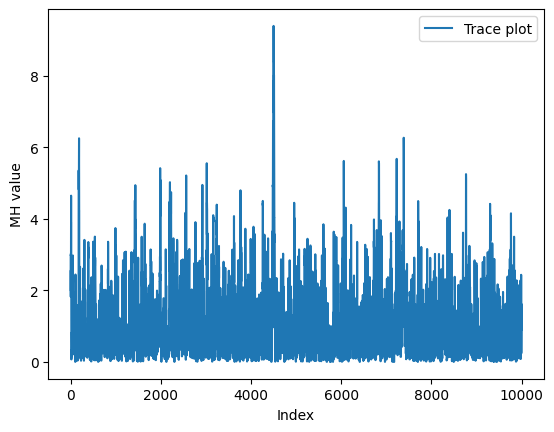

In [ ]:
plt.plot(index, x, label="Trace plot")
plt.xlabel('Index')
plt.ylabel('MH value')
plt.legend()
plt.show()

Figure 5.2 – Plot of the locations visited by the Markov chain  x

In [ ]:
q25, q75 = np.percentile(x, [25, 75])
bin_width = 2 * (q75 - q25) * len(x) ** (-1/3)
bins = round((x.max() - x.min()) / bin_width)
print("Freedman–Diaconis number of bins:", bins)

Freedman–Diaconis number of bins: 89


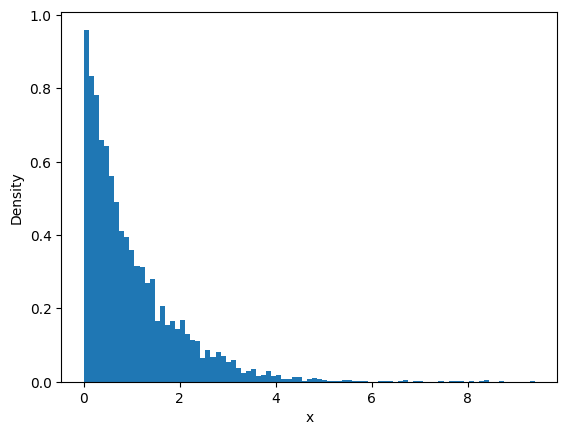

In [ ]:
plt.hist(x, density=True, bins=bins)
plt.ylabel('Density')
plt.xlabel('x');

Figure 5.3 – Histogram of the Markov chain  x

In [ ]:
def run_PySCF(info_dict, pyqmc=True, show=True):
  # Reset the files
  for fname in ['mf.hdf5','optimized_wf.hdf5','vmc_data.hdf5','dmc.hdf5']:
    if os.path.isfile(fname):
        os.remove(fname)
  
  atoms = info_dict['atoms']
  coords = info_dict['coords']
  charge = info_dict['charge']
  multiplicity = info_dict['multiplicity']
  atom_pair = info_dict['atom_pair']

  s = ''
  k = 0
  for atom in atoms:
    s += atoms[k] + ' ' + str(coords[k][0]) + ' ' + str(coords[k][1]) + ' ' + str(coords[k][2]) + '; '
    k += 1
  s = s[0:-2]
  
  mol_PySCF = gto.M(atom = s)
  
  mf = scf.RHF(mol_PySCF)
  mf.chkfile = "mf.hdf5"
  
  conv, e, mo_e, mo, mo_occ = scf.hf.kernel(mf)
  if show:
    if conv:
      print("PySCF restricted HF (RHF) converged ground-state energy: {:.12f}".format(e))
    else:
      print("PySCF restricted HF (RHF) ground-state computation failed to converge")

  if pyqmc:
    pyq.OPTIMIZE("mf.hdf5",# Construct a Slater-Jastrow wave function from the pyscf output
      "optimized_wf.hdf5", # Store optimized parameters in this file.
      nconfig=100,         # Optimize using this many Monte Carlo samples/configurations
      max_iterations=4,    # 4 optimization steps
      verbose=False)

    with h5py.File("optimized_wf.hdf5") as f:
      iter = f['iteration']
      energy = f['energy']
      error = f['energy_error']
      l = energy.shape[0]
      e = energy[l-1]
      err = error[l-1]
      if show:
        if err < 0.1:
          print("Iteration, Energy, Error")
          for k in iter:
            print("{}:         {:.4f} {:.4f}".format(k, energy[k], error[k]))
          print("PyQMC Monte Carlo converged ground-state energy: {:.12f}, error: {:.4f}".format(e, err))
        else:
          print("PyQMC Monte Carlo failed to converge")

  return conv, e

## 5.1.3. Quantum Phase Estimation (QPE)

In [ ]:
def U(theta):
  unitary = QuantumCircuit(1)
  unitary.p(np.pi*2*theta, 0)
  return unitary

In [ ]:
def do_qpe(unitary, nqubits=3, show=True):
  state_in = QuantumCircuit(1)
  state_in.x(0)
  pe = PhaseEstimation(num_evaluation_qubits=nqubits, sampler = Sampler())
  result = pe.estimate(unitary, state_in)
  phase_out = result.phase
  if show:
    print("Number of qubits: {}, QPE phase estimate: {}".format(nqubits, phase_out))
  return(phase_out)

In [ ]:
theta = 1/2 + 1/4 + 1/8
print("theta: {}".format(theta))
unitary = U(theta)
result = do_qpe(unitary, nqubits=3)

theta: 0.875
Number of qubits: 3, QPE phase estimate: 0.875


In [ ]:
theta = 1/2 + 1/4 + 1/8 + 1/16 + 1/32 + 1/64 + 1/128 + 1/256
print("theta: {}".format(theta))
unitary = U(theta)
result = do_qpe(unitary, nqubits=8)

theta: 0.99609375
Number of qubits: 8, QPE phase estimate: 0.99609375


## 5.1.4. Description of the VQE algorithm

Figure 5.4 – VQE algorithm

### Trial wavefunctions


In [ ]:
numpy_solver = NumPyMinimumEigensolver()

In [ ]:
tl_circuit = TwoLocal(rotation_blocks = ['h', 'rx'], entanglement_blocks = 'cz',
                      entanglement='full', reps=2, parameter_prefix = 'y')

In [ ]:
# Leveraging Qiskit Runtime
# https://qiskit.org/documentation/nature/tutorials/07_leveraging_qiskit_runtime.html

#vqe_tl_solver = VQE(ansatz = tl_circuit,
                     #quantum_instance = QuantumInstance(Aer.get_backend('aer_simulator_statevector')))
estimator = Estimator()
optimizer = SPSA(maxiter=100)
vqe_tl_solver = VQE(estimator, tl_circuit, optimizer)

In [ ]:
#vqe_ucc_solver = VQEUCCFactory(quantum_instance, ansatz = tl_circuit)
#https://qiskit.org/documentation/nature/tutorials/03_ground_state_solvers.html
#vqe_ucc_solver = VQEUCCFactory(Estimator(), UCCSD(), SLSQP())
#vqe_ucc_solver is now defined in solve_ground_state()

In [ ]:
qnspsa_loss = []
def qnspsa_callback(nfev, x, fx, stepsize, accepted):
    qnspsa_loss.append(fx)

In [ ]:
# Sampling the potential energy surface
_EPS = 1e-2 # Global variable used to chop small numbers to zero
def bopes(info_dict, mapper_name, num_electrons, num_spatial_orbitals, two_qubit_reduction, z2symmetry_reduction,
          name_solver, perturbation_steps, mapper, solver, show=True):
  
  atoms = info_dict['atoms']
  coords = info_dict['coords']
  charge = info_dict['charge']
  multiplicity = info_dict['multiplicity']
  atom_pair = info_dict['atom_pair']

  size = len(perturbation_steps)
  
  energy = np.empty(size)

  x0 = coords[atom_pair[0]][0]
  y0 = coords[atom_pair[0]][1]
  z0 = coords[atom_pair[0]][2]
  if show:
    print("x0, y0, z0 :", x0, y0, z0)
  
  x1 = coords[atom_pair[1]][0]
  y1 = coords[atom_pair[1]][1]
  z1 = coords[atom_pair[1]][2]
  if show:
    print("x1, y1, z1 :", x1, y1, z1)
    
  if abs(x1 - x0) > _EPS:
    # Find the equation of a straight line y = m*x + p that crosses the points of the atom pair
    m = (y1 - y0)/(x1 - x0)
    p = y0 - m*x0  
  
  for k in range(size):
    if (abs(x0)<_EPS and abs(y0)<_EPS):
      z0_new = z0 + perturbation_steps[k]
      coords_new = []
      for l in range(len(coords)):
        if l == atom_pair[0]:
          coords_new.append((0.0, 0.0, z0_new))
        else:
          coords_new.append(coords[l])

    elif (abs(z0)<_EPS and abs(z1)<_EPS):
      x0_new = x0 + perturbation_steps[k]
      y0_new = m*x0_new + p
      coords_new = []
      for l in range(len(coords)):
        if l == atom_pair[0]:
          coords_new.append((x0_new, y0_new, 0.0))
        else:
          coords_new.append(coords[l])
    
    info_dict_new={'atoms':atoms, 'coords':coords_new, 'charge':charge, 
                  'multiplicity':multiplicity, 'atom_pair':atom_pair}
    
    fermionic_hamiltonian, num_particles, num_spin_orbitals, qubit_op, mapper, ground_state = \
    solve_ground_state(info_dict_new, mapper_name=mapper_name, num_electrons=num_electrons, num_spatial_orbitals=num_spatial_orbitals,
                  two_qubit_reduction=two_qubit_reduction, z2symmetry_reduction=z2symmetry_reduction, 
                  name_solver=name_solver, solver=solver, pyqmc=False)
    
    energy[k] = ground_state.total_energies
    
  return perturbation_steps, energy

# 5.2. Example chemical calculations

In [ ]:
def get_particle_number(problem, show=True):
  
  # https://qiskit.org/documentation/nature/stubs/qiskit_nature.second_q.problems.ElectronicStructureProblem.num_spin_orbitals.html
  num_spin_orbitals = problem.num_spin_orbitals
  num_particles = problem.num_particles
  
  if show:
    print("Number of particles: {}".format(num_particles))
    print("Number of spin orbitals: {}".format(num_spin_orbitals))
    
  return num_particles, num_spin_orbitals

In [ ]:
def fermion_to_qubit(problem, second_q_op, mapper_name, truncate=20, two_qubit_reduction=False, z2symmetry_reduction=None, show=True): 
# Electronic Structure Problems with v0.5
# https://qiskit.org/documentation/nature/migration/00b_Electronic_structure_with_v0.5.html
# https://qiskit.org/documentation/nature/stubs/qiskit_nature.second_q.mappers.QubitConverter.html#qubitconverter
# https://qiskit.org/ecosystem/nature/migration/0.6_c_qubit_converter.html
  if show:
    print("Qubit Hamiltonian operator")
    print("{} transformation ". format(mapper_name))

  match mapper_name:
    case "Jordan-Wigner":
      mapper = JordanWignerMapper()
    case "Parity":
      mapper = ParityMapper(num_particles=problem.num_particles)
    case "Bravyi-Kitaev":
      mapper = BravyiKitaevMapper()
  
  qubit_op = mapper.map(second_q_op)
  
  if z2symmetry_reduction != None:
    tapered_mapper = problem.get_tapered_mapper(mapper)
    qubit_op = tapered_mapper.map(second_q_op)
    
  n_items = len(qubit_op)
  if show:
    print("Number of items in the Pauli list:", n_items)
    if n_items <= truncate:
      print(qubit_op)
    else:
      print(qubit_op[0:truncate])
  return qubit_op, mapper

In [ ]:
# Leveraging Qiskit Runtime
# https://qiskit.org/documentation/nature/tutorials/07_leveraging_qiskit_runtime.html
def run_vqe(name, problem, qubit_converter, solver, show=True):
  calc = GroundStateEigensolver(qubit_converter, solver)
  start = time.time()
  ground_state = calc.solve(problem)
  elapsed = str(datetime.timedelta(seconds = time.time()-start))
  if show:
    print("Running the VQE using the {}".format(name))
    print("Elapsed time: {} \n".format(elapsed))
    print(ground_state)
  return ground_state

In [ ]:
def run_qpe(qubit_op, n_ancillae=3, num_time_slices=1, show=True):
  
  qpe = HamiltonianPhaseEstimation(n_ancillae, sampler=Sampler())
  state_preparation = None
  result = qpe.estimate(qubit_op, state_preparation, evolution=None)

  if show:
    eigv = np.real(result.most_likely_eigenvalue)
    print("QPE computed electronic ground state energy (Hartree): {}".format(eigv))
  
  return eigv

In [ ]:
def plot_energy_landscape(dist, energy):
  if len(dist) > 1:
      plt.plot(dist, energy, label="VQE Energy")
      plt.xlabel('Atomic distance Deviation(Angstrom)')
      plt.ylabel('Energy (hartree)')
      plt.legend()
      plt.show()
  else:
      print("Total Energy is: ", energy_surface_result.energies[0], "hartree")
      print("(No need to plot, only one configuration calculated.)")
  return

In [ ]:
def plot_loss(loss, label, target):
  plt.figure(figsize=(12, 6))
  plt.plot(loss, 'tab:green', ls='--', label=label)
  plt.axhline(target, c='tab:red', ls='--', label='target')
  plt.ylabel('loss')
  plt.xlabel('iterations')
  plt.legend()

In [ ]:
settings.use_pauli_sum_op = False

def solve_ground_state(
    info_dict,
    mapper_name="Parity",
    num_electrons=None,
    num_spatial_orbitals=None,
    freeze_core=None, 
    two_qubit_reduction=False,
    z2symmetry_reduction = "Auto",
    name_solver='NumPy exact solver',
    solver=NumPyMinimumEigensolver(),
    plot_bopes=False,
    perturbation_steps=np.linspace(-1, 1, 3),
    pyqmc=True,
    n_ancillae=3, 
    num_time_slices=1,
    loss=[],
    label=None,
    target=None,
    show=True
):
    
    atoms = info_dict['atoms']
    coords = info_dict['coords']
    charge = info_dict['charge']
    multiplicity = info_dict['multiplicity']
    atom_pair = info_dict['atom_pair']
    
    moleculeinfo = MoleculeInfo(atoms, coords, charge=charge, multiplicity=multiplicity)
    
    # Defining the electronic structure molecule driver
    # Electronic Structure Problems with v0.5
    # https://qiskit.org/documentation/nature/migration/00b_Electronic_structure_with_v0.5.html
    # https://qiskit.org/documentation/nature/tutorials/01_electronic_structure.html
    
    #driver = ElectronicStructureMoleculeDriver(molecule, basis='sto3g', driver_type=ElectronicStructureDriverType.PYSCF)
    driver = PySCFDriver.from_molecule(moleculeinfo, basis="sto3g")

    # Splitting into classical and quantum
    if num_electrons != None and num_spatial_orbitals != None:
      # https://qiskit.org/documentation/nature/tutorials/05_problem_transformers.html
      # https://qiskit.org/documentation/nature/stubs/qiskit_nature.second_q.transformers.ActiveSpaceTransformer.html#activespacetransformer
      split = ActiveSpaceTransformer(num_electrons=num_electrons, num_spatial_orbitals=num_spatial_orbitals)
    else:
      split = None

    # Define an electronic structure problem
    problem = driver.run()
    if split != None:
      problem = split.transform(problem)
    elif freeze_core != None:
      problem = freeze_core.transform(problem)
    
    # Get the electronic energy fermionic Hamiltonian
    fermionic_hamiltonian = problem.hamiltonian
    second_q_op = fermionic_hamiltonian.second_q_op()
    
    if show:
      print("Fermionic Hamiltonian operator")
      # We print the first 20 terms of the fermionic Hamiltonian operator of the molecule
      # https://qiskit.org/documentation/nature/migration/00b_Electronic_structure_with_v0.5.html
      print("\n".join(str(second_q_op).splitlines()[:20] + ["..."]))
    
     # Get number of particles and number of spin orbitals
    num_particles, num_spin_orbitals = get_particle_number(problem, show=show)
    
    # Use the function fermion_to_qubit() to convert a fermionic operator to a qubit operator
    if show:
      print(" ")
    qubit_op, mapper = fermion_to_qubit(problem, second_q_op, mapper_name, two_qubit_reduction=two_qubit_reduction, z2symmetry_reduction=z2symmetry_reduction, show=show)
    
    # Run the the PySCF RHF method
    if show:
      print(" ")
    conv, e = run_PySCF(info_dict, pyqmc=pyqmc, show=show)
    
    # Run QPE
    eigv = run_qpe(qubit_op, n_ancillae=n_ancillae, num_time_slices=num_time_slices, show=show)

    # Run VQE
    if show:
      print(" ")
    
    #https://qiskit.org/ecosystem/nature/howtos/vqe_ucc.html
    if name_solver == 'UCCSD ansatz':
      ansatz = UCCSD(
        problem.num_spatial_orbitals,
        problem.num_particles,
        mapper,
        initial_state=HartreeFock(problem.num_spatial_orbitals,problem.num_particles,mapper),
        )
      solver = VQE(Estimator(), ansatz, SLSQP())
    
    ground_state = run_vqe(name_solver, problem, mapper, solver, show=show)
    # Plot loss function
    if loss != []:
      plot_loss(loss, label, target)
    
    if plot_bopes:
      # Compute the potential energy surface
      dist, energy = bopes(info_dict, mapper_name, num_electrons, num_spatial_orbitals, two_qubit_reduction, z2symmetry_reduction,
          name_solver, perturbation_steps, mapper, solver, show=True)
      
      # Plot the energy as a function of atomic separation
      plot_energy_landscape(dist, energy)

    return fermionic_hamiltonian, num_particles, num_spin_orbitals, qubit_op, mapper, ground_state

## 5.2.1. Hydrogen molecule

In [ ]:
# Electronic Structure Problems with v0.5
# https://qiskit.org/documentation/nature/migration/00b_Electronic_structure_with_v0.5.html
H2_atoms = ["H", "H"]
H2_coords = [(0.0, 0.0, 0.0), (0.0, 0.0, 0.735)]
H2_charge = 0
H2_multiplicity = 1
H2_atom_pair=(1, 0)
H2_info_dict={'atoms':H2_atoms, 'coords':H2_coords, 'charge':H2_charge, 'multiplicity':H2_multiplicity, 'atom_pair':H2_atom_pair}

H2_moleculeinfo = MoleculeInfo(H2_atoms, H2_coords, charge=H2_charge, multiplicity=H2_multiplicity)

In [ ]:
molecular_variation = Molecule.absolute_stretching

In [ ]:
specific_molecular_variation = apply_variation(molecular_variation, atom_pair=(1, 0))

In [ ]:
# The MoleculeInfo has become a pure data container and no longer supports degrees of freedom.
H2_molecule_stretchable = Molecule(geometry=
                                 [['H', [0., 0., 0.]], ['H', [0., 0., 0.735]]], charge=0, multiplicity=1,
                                 degrees_of_freedom=[specific_molecular_variation])

In [ ]:
H2_fermionic_hamiltonian, H2_num_particles, H2_num_spin_orbitals, H2_qubit_op, H2_qubit_converter, H2_ground_state = \
                  solve_ground_state(H2_info_dict, mapper_name="Parity",
                  two_qubit_reduction=True, z2symmetry_reduction=None, 
                  name_solver = 'NumPy exact solver', solver = numpy_solver)

Fermionic Hamiltonian operator
Fermionic Operator
number spin orbitals=4, number terms=36
  -1.25633907300325 * ( +_0 -_0 )
+ -0.47189600728114184 * ( +_1 -_1 )
+ -1.25633907300325 * ( +_2 -_2 )
+ -0.47189600728114184 * ( +_3 -_3 )
+ 0.33785507740175813 * ( +_0 +_0 -_0 -_0 )
+ 0.09046559989211568 * ( +_0 +_0 -_1 -_1 )
+ 0.09046559989211564 * ( +_0 +_1 -_0 -_1 )
+ 0.33229086512764827 * ( +_0 +_1 -_1 -_0 )
+ 0.33785507740175813 * ( +_0 +_2 -_2 -_0 )
+ 0.09046559989211568 * ( +_0 +_2 -_3 -_1 )
+ 0.09046559989211564 * ( +_0 +_3 -_2 -_1 )
+ 0.33229086512764827 * ( +_0 +_3 -_3 -_0 )
+ 0.3322908651276482 * ( +_1 +_0 -_0 -_1 )
+ 0.09046559989211574 * ( +_1 +_0 -_1 -_0 )
+ 0.09046559989211565 * ( +_1 +_1 -_0 -_0 )
+ 0.3492868613660089 * ( +_1 +_1 -_1 -_1 )
+ 0.3322908651276482 * ( +_1 +_2 -_2 -_1 )
+ 0.09046559989211574 * ( +_1 +_2 -_3 -_0 )
...
Number of particles: (1, 1)
Number of spin orbitals: 4
 
Qubit Hamiltonian operator
Parity transformation 
Number of items in the Pauli list: 5
SparseP

Figure 5.5. Ground-state of the $\text{H}_{2}$ molecule with PySCF RHF and PyQMC Monte Carlo

Figure 5.6. Ground-state of the $\text{H}_{2}$ molecule computed with VQE using the NumPy minimum eigensolver

In [ ]:
H2_fermionic_hamiltonian, H2_num_particles, H2_num_spin_orbitals, H2_qubit_op, H2_qubit_converter, H2_ground_state = \
                  solve_ground_state(H2_info_dict, mapper_name="Parity",
                  two_qubit_reduction=True, z2symmetry_reduction=None, 
                  name_solver = 'UCCSD ansatz')

Fermionic Hamiltonian operator
Fermionic Operator
number spin orbitals=4, number terms=36
  -1.25633907300325 * ( +_0 -_0 )
+ -0.47189600728114184 * ( +_1 -_1 )
+ -1.25633907300325 * ( +_2 -_2 )
+ -0.47189600728114184 * ( +_3 -_3 )
+ 0.33785507740175813 * ( +_0 +_0 -_0 -_0 )
+ 0.09046559989211568 * ( +_0 +_0 -_1 -_1 )
+ 0.09046559989211564 * ( +_0 +_1 -_0 -_1 )
+ 0.33229086512764827 * ( +_0 +_1 -_1 -_0 )
+ 0.33785507740175813 * ( +_0 +_2 -_2 -_0 )
+ 0.09046559989211568 * ( +_0 +_2 -_3 -_1 )
+ 0.09046559989211564 * ( +_0 +_3 -_2 -_1 )
+ 0.33229086512764827 * ( +_0 +_3 -_3 -_0 )
+ 0.3322908651276482 * ( +_1 +_0 -_0 -_1 )
+ 0.09046559989211574 * ( +_1 +_0 -_1 -_0 )
+ 0.09046559989211565 * ( +_1 +_1 -_0 -_0 )
+ 0.3492868613660089 * ( +_1 +_1 -_1 -_1 )
+ 0.3322908651276482 * ( +_1 +_2 -_2 -_1 )
+ 0.09046559989211574 * ( +_1 +_2 -_3 -_0 )
...
Number of particles: (1, 1)
Number of spin orbitals: 4
 
Qubit Hamiltonian operator
Parity transformation 
Number of items in the Pauli list: 5
SparseP

Figure 5.7. Ground-state of the $\text{H}_{2}$ molecule with VQE using the UCC factory ansatz.

In [ ]:
H2_fermionic_hamiltonian, H2_num_particles, H2_num_spin_orbitals, H2_qubit_op, H2_qubit_converter, H2_ground_state = \
                  solve_ground_state(H2_info_dict, mapper_name="Parity",
                   two_qubit_reduction=True, z2symmetry_reduction=None, 
                   name_solver = 'Heuristic ansatz, the Two-Local circuit with SLSQP',solver = vqe_tl_solver)

Fermionic Hamiltonian operator
Fermionic Operator
number spin orbitals=4, number terms=36
  -1.25633907300325 * ( +_0 -_0 )
+ -0.47189600728114184 * ( +_1 -_1 )
+ -1.25633907300325 * ( +_2 -_2 )
+ -0.47189600728114184 * ( +_3 -_3 )
+ 0.33785507740175813 * ( +_0 +_0 -_0 -_0 )
+ 0.09046559989211568 * ( +_0 +_0 -_1 -_1 )
+ 0.09046559989211564 * ( +_0 +_1 -_0 -_1 )
+ 0.33229086512764827 * ( +_0 +_1 -_1 -_0 )
+ 0.33785507740175813 * ( +_0 +_2 -_2 -_0 )
+ 0.09046559989211568 * ( +_0 +_2 -_3 -_1 )
+ 0.09046559989211564 * ( +_0 +_3 -_2 -_1 )
+ 0.33229086512764827 * ( +_0 +_3 -_3 -_0 )
+ 0.3322908651276482 * ( +_1 +_0 -_0 -_1 )
+ 0.09046559989211574 * ( +_1 +_0 -_1 -_0 )
+ 0.09046559989211565 * ( +_1 +_1 -_0 -_0 )
+ 0.3492868613660089 * ( +_1 +_1 -_1 -_1 )
+ 0.3322908651276482 * ( +_1 +_2 -_2 -_1 )
+ 0.09046559989211574 * ( +_1 +_2 -_3 -_0 )
...
Number of particles: (1, 1)
Number of spin orbitals: 4
 
Qubit Hamiltonian operator
Parity transformation 
Number of items in the Pauli list: 5
SparseP

Figure 5.8. Ground-state of the $\text{H}_{2}$ molecule with VQE using the Two-Local circuit and SLSQP

In [ ]:
#https://qiskit.org/documentation/stubs/qiskit.algorithms.optimizers.QNSPSA.html?highlight=qnspsa#qiskit.algorithms.optimizers.QNSPSA
#qiskit.algorithms.optimizers.QNSPSA.get_fidelity
#https://qiskit.org/documentation/stubs/qiskit.algorithms.optimizers.QNSPSA.get_fidelity.html
qnspsa_loss = []
ansatz = tl_circuit
#fidelity = QNSPSA.get_fidelity(ansatz, quantum_instance, expectation=PauliExpectation())
fidelity = QNSPSA.get_fidelity(ansatz, sampler=Sampler())
qnspsa = QNSPSA(fidelity, maxiter=200, learning_rate=0.01, perturbation=0.7, callback=qnspsa_callback)

In [ ]:
vqe_tl_QNSPSA_solver = VQE(estimator, tl_circuit, optimizer=qnspsa)

Fermionic Hamiltonian operator
Fermionic Operator
number spin orbitals=4, number terms=36
  -1.25633907300325 * ( +_0 -_0 )
+ -0.47189600728114184 * ( +_1 -_1 )
+ -1.25633907300325 * ( +_2 -_2 )
+ -0.47189600728114184 * ( +_3 -_3 )
+ 0.33785507740175813 * ( +_0 +_0 -_0 -_0 )
+ 0.09046559989211568 * ( +_0 +_0 -_1 -_1 )
+ 0.09046559989211564 * ( +_0 +_1 -_0 -_1 )
+ 0.33229086512764827 * ( +_0 +_1 -_1 -_0 )
+ 0.33785507740175813 * ( +_0 +_2 -_2 -_0 )
+ 0.09046559989211568 * ( +_0 +_2 -_3 -_1 )
+ 0.09046559989211564 * ( +_0 +_3 -_2 -_1 )
+ 0.33229086512764827 * ( +_0 +_3 -_3 -_0 )
+ 0.3322908651276482 * ( +_1 +_0 -_0 -_1 )
+ 0.09046559989211574 * ( +_1 +_0 -_1 -_0 )
+ 0.09046559989211565 * ( +_1 +_1 -_0 -_0 )
+ 0.3492868613660089 * ( +_1 +_1 -_1 -_1 )
+ 0.3322908651276482 * ( +_1 +_2 -_2 -_1 )
+ 0.09046559989211574 * ( +_1 +_2 -_3 -_0 )
...
Number of particles: (1, 1)
Number of spin orbitals: 4
 
Qubit Hamiltonian operator
Parity transformation 
Number of items in the Pauli list: 5
SparseP

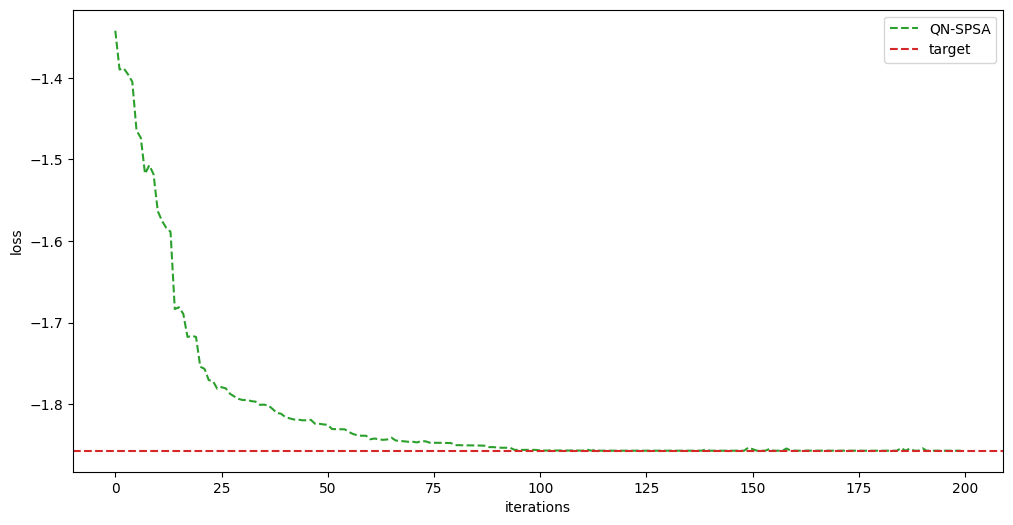

In [ ]:
H2_fermionic_hamiltonian, H2_num_particles, H2_num_spin_orbitals, H2_qubit_op, H2_qubit_converter, H2_ground_state = \
                  solve_ground_state(H2_info_dict, mapper_name="Parity", two_qubit_reduction=True, z2symmetry_reduction=None,
                  loss=qnspsa_loss, label='QN-SPSA', target=-1.857274810366,
                  name_solver='Two-Local circuit and the QN-SPSA optimizer', solver=vqe_tl_QNSPSA_solver)

Figure 5.9 – Ground-state of the $\text{H}_{2}$ molecule with VQE using the Two-Local circuit and QN-SPSA

Figure 5.10 – Plot of the loss function of the VQE using the Two-Local circuit and QN-SPSA for the $\text{H}_{2}$ molecule

Figure 5.11 – Table summarizing the calculations of the ground state energy obtained with the $\text{H}_{2}$ molecule

### Computing the BOPES

Fermionic Hamiltonian operator
Fermionic Operator
number spin orbitals=4, number terms=36
  -1.25633907300325 * ( +_0 -_0 )
+ -0.47189600728114184 * ( +_1 -_1 )
+ -1.25633907300325 * ( +_2 -_2 )
+ -0.47189600728114184 * ( +_3 -_3 )
+ 0.33785507740175813 * ( +_0 +_0 -_0 -_0 )
+ 0.09046559989211568 * ( +_0 +_0 -_1 -_1 )
+ 0.09046559989211564 * ( +_0 +_1 -_0 -_1 )
+ 0.33229086512764827 * ( +_0 +_1 -_1 -_0 )
+ 0.33785507740175813 * ( +_0 +_2 -_2 -_0 )
+ 0.09046559989211568 * ( +_0 +_2 -_3 -_1 )
+ 0.09046559989211564 * ( +_0 +_3 -_2 -_1 )
+ 0.33229086512764827 * ( +_0 +_3 -_3 -_0 )
+ 0.3322908651276482 * ( +_1 +_0 -_0 -_1 )
+ 0.09046559989211574 * ( +_1 +_0 -_1 -_0 )
+ 0.09046559989211565 * ( +_1 +_1 -_0 -_0 )
+ 0.3492868613660089 * ( +_1 +_1 -_1 -_1 )
+ 0.3322908651276482 * ( +_1 +_2 -_2 -_1 )
+ 0.09046559989211574 * ( +_1 +_2 -_3 -_0 )
...
Number of particles: (1, 1)
Number of spin orbitals: 4
 
Qubit Hamiltonian operator
Parity transformation 
Number of items in the Pauli list: 5
SparseP

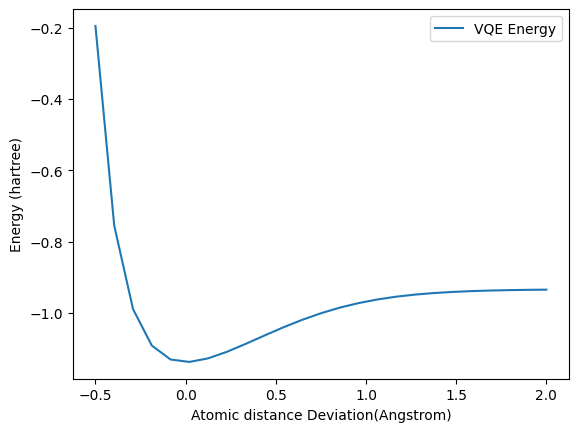

In [ ]:
perturbation_steps = np.linspace(-0.5, 2, 25) # 25 equally spaced points from -0.2 to 4, inclusive.
H2_s_fermionic_hamiltonian, H2_s_num_particles, H2_s_num_spin_orbitals, H2_s_qubit_op, H2_s_qubit_converter, H2_s_ground_state = \
                  solve_ground_state(H2_info_dict, mapper_name="Parity",
                   two_qubit_reduction=True, z2symmetry_reduction=None, 
                   name_solver = 'NumPy exact solver', solver = numpy_solver,
                   plot_bopes = True, perturbation_steps=perturbation_steps)

Figure 5.12 – Plot of the BOPES of the hydrogen molecule

## 5.2.2. Lithium hydride molecule

In [ ]:
LiH_atoms = ["Li", "H"]
LiH_coords = [(0.0, 0.0, 0.0), (0.0, 0.0, 1.5474)]
LiH_charge = 0
LiH_multiplicity = 1
LiH_atom_pair=(1,0)
LiH_info_dict={'atoms':LiH_atoms, 'coords':LiH_coords, 'charge':LiH_charge, 'multiplicity':LiH_multiplicity, 'atom_pair':LiH_atom_pair}

LiH_moleculeinfo = MoleculeInfo(LiH_atoms, LiH_coords, charge=LiH_charge, multiplicity=LiH_multiplicity)

### Varying the lithium hydride molecule

In [ ]:
LiH_molecule_stretchable = Molecule(geometry=[['Li', [0., 0., 0.]], ['H', [0., 0., 1.5474]]], charge=0, multiplicity=1,
                                   degrees_of_freedom=[specific_molecular_variation])

### Solving for the Ground-state

In [ ]:
LiH_fermionic_hamiltonian, LiH_num_particles, LiH_num_spin_orbitals, LiH_qubit_op, LiH_qubit_converter, LiH_ground_state = \
                  solve_ground_state(LiH_info_dict, mapper_name="Parity",
                  freeze_core=FreezeCoreTransformer(freeze_core=True, remove_orbitals=[4, 3]),
                  two_qubit_reduction=True, z2symmetry_reduction="auto", 
                  name_solver='NumPy exact solver', solver=numpy_solver)

Fermionic Hamiltonian operator
Fermionic Operator
number spin orbitals=6, number terms=342
  -0.7806641137752539 * ( +_0 -_0 )
+ 0.047702127436324446 * ( +_0 -_1 )
+ -0.129581187960107 * ( +_0 -_2 )
+ 0.04770212743632441 * ( +_1 -_0 )
+ -0.3590972946155545 * ( +_1 -_1 )
+ 0.0682380287350641 * ( +_1 -_2 )
+ -0.12958118796010715 * ( +_2 -_0 )
+ 0.06823802873506388 * ( +_2 -_1 )
+ -0.2261711485620772 * ( +_2 -_2 )
+ -0.7806641137752539 * ( +_3 -_3 )
+ 0.047702127436324446 * ( +_3 -_4 )
+ -0.129581187960107 * ( +_3 -_5 )
+ 0.04770212743632441 * ( +_4 -_3 )
+ -0.3590972946155545 * ( +_4 -_4 )
+ 0.0682380287350641 * ( +_4 -_5 )
+ -0.12958118796010715 * ( +_5 -_3 )
+ 0.06823802873506388 * ( +_5 -_4 )
+ -0.2261711485620772 * ( +_5 -_5 )
...
Number of particles: (1, 1)
Number of spin orbitals: 6
 
Qubit Hamiltonian operator
Parity transformation 
Number of items in the Pauli list: 100
SparsePauliOp(['IIII', 'IIIZ', 'IIZX', 'IIIX', 'IIXX', 'IIYY', 'IIZZ', 'IIXZ', 'IIXI', 'IIZI', 'IZII', 'ZXII', 

Figure 5.13 – Ground-state of the $\text{LiH}$ molecule with PySCF RHF, PyQMC Monte Carlo and QPE

Figure 5.14. Ground-state of the $\text{LiH}$ molecule with VQE using the NumPy minimum eigensolver

In [ ]:
LiH_fermionic_hamiltonian, LiH_num_particles, LiH_num_spin_orbitals, LiH_qubit_op, LiH_qubit_converter, LiH_ground_state = \
                  solve_ground_state(LiH_info_dict, mapper_name="Parity",
                  freeze_core=FreezeCoreTransformer(freeze_core=True, remove_orbitals=[4, 3]),
                  two_qubit_reduction=True, z2symmetry_reduction="auto", 
                  name_solver = 'Heuristic ansatz, the Two-Local circuit with SLSQP', solver = vqe_tl_solver)

Fermionic Hamiltonian operator
Fermionic Operator
number spin orbitals=6, number terms=342
  -0.7806641137752564 * ( +_0 -_0 )
+ 0.047702127436311 * ( +_0 -_1 )
+ -0.12958118796011278 * ( +_0 -_2 )
+ 0.04770212743631109 * ( +_1 -_0 )
+ -0.3590972946155522 * ( +_1 -_1 )
+ 0.06823802873506109 * ( +_1 -_2 )
+ -0.12958118796011267 * ( +_2 -_0 )
+ 0.06823802873506084 * ( +_2 -_1 )
+ -0.2261711485620791 * ( +_2 -_2 )
+ -0.7806641137752564 * ( +_3 -_3 )
+ 0.047702127436311 * ( +_3 -_4 )
+ -0.12958118796011278 * ( +_3 -_5 )
+ 0.04770212743631109 * ( +_4 -_3 )
+ -0.3590972946155522 * ( +_4 -_4 )
+ 0.06823802873506109 * ( +_4 -_5 )
+ -0.12958118796011267 * ( +_5 -_3 )
+ 0.06823802873506084 * ( +_5 -_4 )
+ -0.2261711485620791 * ( +_5 -_5 )
...
Number of particles: (1, 1)
Number of spin orbitals: 6
 
Qubit Hamiltonian operator
Parity transformation 
Number of items in the Pauli list: 100
SparsePauliOp(['IIII', 'IIIZ', 'IIZX', 'IIIX', 'IIXX', 'IIYY', 'IIZZ', 'IIXZ', 'IIXI', 'IIZI', 'IZII', 'ZXII', 

Figure 5.15 – Ground-state of the $\text{LiH}$ molecule with VQE using the Two-Local circuit and SLSQP

In [ ]:
qnspsa_loss = []
ansatz = tl_circuit
#fidelity = QNSPSA.get_fidelity(ansatz, quantum_instance, expectation=PauliExpectation())
fidelity = QNSPSA.get_fidelity(ansatz, sampler=Sampler())
qnspsa = QNSPSA(fidelity, maxiter=500, learning_rate=0.01, perturbation=0.7, callback=qnspsa_callback)

In [ ]:
vqe_tl_QNSPSA_solver = VQE(estimator, tl_circuit, optimizer=qnspsa)

Fermionic Hamiltonian operator
Fermionic Operator
number spin orbitals=6, number terms=342
  -0.7806641137752486 * ( +_0 -_0 )
+ 0.047702127436363054 * ( +_0 -_1 )
+ -0.1295811879600963 * ( +_0 -_2 )
+ 0.04770212743636303 * ( +_1 -_0 )
+ -0.35909729461556517 * ( +_1 -_1 )
+ 0.06823802873507258 * ( +_1 -_2 )
+ -0.1295811879600962 * ( +_2 -_0 )
+ 0.06823802873507258 * ( +_2 -_1 )
+ -0.22617114856207277 * ( +_2 -_2 )
+ -0.7806641137752486 * ( +_3 -_3 )
+ 0.047702127436363054 * ( +_3 -_4 )
+ -0.1295811879600963 * ( +_3 -_5 )
+ 0.04770212743636303 * ( +_4 -_3 )
+ -0.35909729461556517 * ( +_4 -_4 )
+ 0.06823802873507258 * ( +_4 -_5 )
+ -0.1295811879600962 * ( +_5 -_3 )
+ 0.06823802873507258 * ( +_5 -_4 )
+ -0.22617114856207277 * ( +_5 -_5 )
...
Number of particles: (1, 1)
Number of spin orbitals: 6
 
Qubit Hamiltonian operator
Parity transformation 
Number of items in the Pauli list: 100
SparsePauliOp(['IIII', 'IIIZ', 'IIZX', 'IIIX', 'IIXX', 'IIYY', 'IIZZ', 'IIXZ', 'IIXI', 'IIZI', 'IZII', 'Z

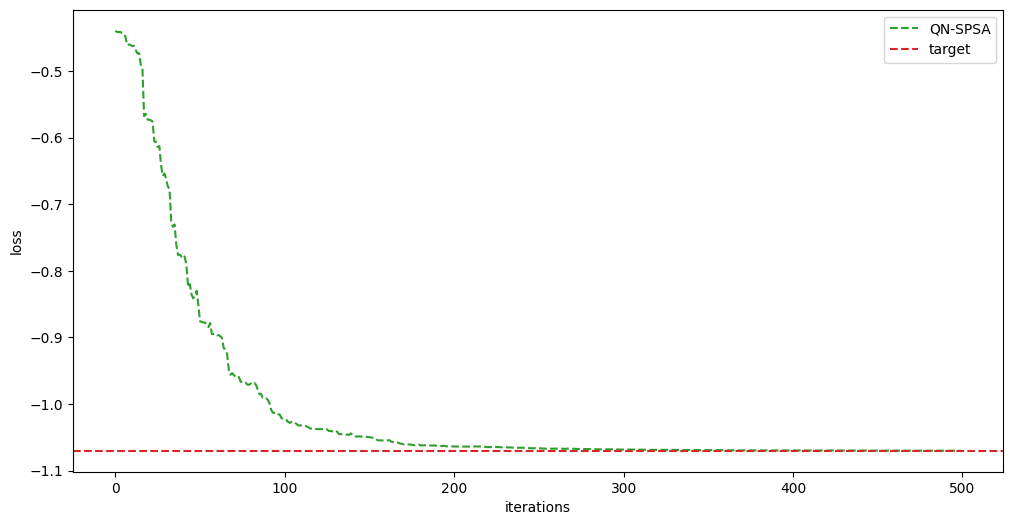

In [ ]:
LiH_fermionic_hamiltonian, LiH_num_particles, LiH_num_spin_orbitals, LiH_qubit_op, LiH_qubit_converter, LiH_ground_state = \
                  solve_ground_state(LiH_info_dict, mapper_name="Parity",
                  freeze_core=FreezeCoreTransformer(freeze_core=True, remove_orbitals=[4, 3]),
                  two_qubit_reduction=True, z2symmetry_reduction="auto", loss=qnspsa_loss, label='QN-SPSA', target=-1.0703584,
                  name_solver='Two-Local circuit and the QN-SPSA optimizer', solver=vqe_tl_QNSPSA_solver)

Figure 5.16 – Ground-state of the $\text{LiH}$ molecule with VQE using the Two-Local circuit and QN-SPSA

Figure 5.17 – Loss function of the VQE using the Two-Local circuit and QN-SPSA for the $\text{LiH}$ molecule

Figure 5.18 – Table summarizing the calculations of the ground state energy obtained with the $\text{LiH}$ molecule

### Computing the Born-Oppenheimer Potential Energy Surface (BOPES)


Fermionic Hamiltonian operator
Fermionic Operator
number spin orbitals=6, number terms=342
  -0.7806641137752587 * ( +_0 -_0 )
+ 0.04770212743629596 * ( +_0 -_1 )
+ -0.12958118796011647 * ( +_0 -_2 )
+ 0.047702127436295885 * ( +_1 -_0 )
+ -0.3590972946155474 * ( +_1 -_1 )
+ 0.06823802873505752 * ( +_1 -_2 )
+ -0.1295811879601165 * ( +_2 -_0 )
+ 0.0682380287350572 * ( +_2 -_1 )
+ -0.22617114856207998 * ( +_2 -_2 )
+ -0.7806641137752587 * ( +_3 -_3 )
+ 0.04770212743629596 * ( +_3 -_4 )
+ -0.12958118796011647 * ( +_3 -_5 )
+ 0.047702127436295885 * ( +_4 -_3 )
+ -0.3590972946155474 * ( +_4 -_4 )
+ 0.06823802873505752 * ( +_4 -_5 )
+ -0.1295811879601165 * ( +_5 -_3 )
+ 0.0682380287350572 * ( +_5 -_4 )
+ -0.22617114856207998 * ( +_5 -_5 )
...
Number of particles: (1, 1)
Number of spin orbitals: 6
 
Qubit Hamiltonian operator
Parity transformation 
Number of items in the Pauli list: 100
SparsePauliOp(['IIII', 'IIIZ', 'IIZX', 'IIIX', 'IIXX', 'IIYY', 'IIZZ', 'IIXZ', 'IIXI', 'IIZI', 'IZII', 'ZXI

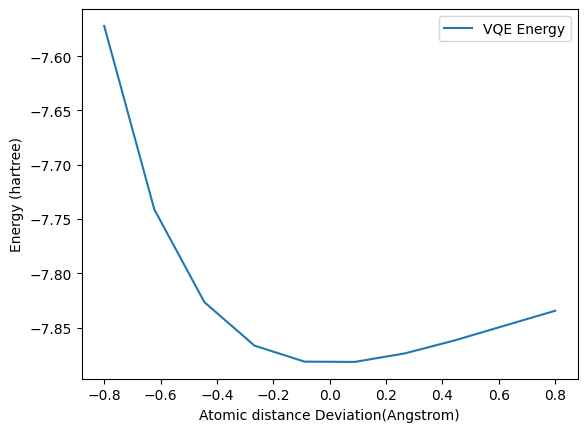

In [ ]:
perturbation_steps = np.linspace(-0.8, 0.8, 10) # 10 equally spaced points from -0.8 to 0.8, inclusive.
LiH_s_fermionic_hamiltonian, LiH_s_num_particles, LiH_s_num_spin_orbitals, LiH_s_qubit_op, LiH_s_qubit_converter, LiH_s_ground_state = \
                  solve_ground_state(LiH_info_dict, mapper_name="Parity",
                  freeze_core=FreezeCoreTransformer(freeze_core=True, remove_orbitals=[4, 3]),
                   two_qubit_reduction=True, z2symmetry_reduction="auto", 
                   name_solver='NumPy exact solver', solver=numpy_solver,
                   plot_bopes=True, perturbation_steps=perturbation_steps)

Figure 5.19 – Plot of the Born-Oppenheimer Potential Energy Surface (BOPES) of the $\text{LiH}$ molecule

## 5.2.3. Macro molecule


In [ ]:
macro_ASE = Atoms('ONCHHHC', [(1.1280, 0.2091, 0.0000), 
                          (-1.1878, 0.1791, 0.0000), 
                          (0.0598, -0.3882, 0.0000),
                          (-1.3085, 1.1864, 0.0001),
                          (-2.0305, -0.3861, -0.0001),
                          (-0.0014, -1.4883, -0.0001),
                          (-0.1805, 1.3955, 0.0000)])

In [ ]:
view(macro_ASE, viewer='x3d')

Figure 5.20 – Macro molecule

In [ ]:
molecular_variation = Molecule.absolute_stretching

In [ ]:
specific_molecular_variation = apply_variation(molecular_variation, atom_pair=(6, 1))

In [ ]:
M_atoms = ["O", "N","C","H","H","H","C"]
M_coords = [(1.1280, 0.2091, 0.0000), 
                    (-1.1878, 0.1791, 0.0000),
                    (0.0598, -0.3882, 0.0000),
                    (-1.3085, 1.1864, 0.0001),
                    (-2.0305, -0.3861, -0.0001),
                    (-0.0014, -1.4883, -0.0001),
                    (-0.1805, 1.3955, 0.0000)]
M_charge = 0
M_multiplicity = 1
M_atom_pair=(6, 1)
M_info_dict={'atoms':M_atoms, 'coords':M_coords, 'charge':M_charge, 'multiplicity':M_multiplicity, 'atom_pair':M_atom_pair}

macromoleculeinfo = MoleculeInfo(M_atoms, M_coords, charge=M_charge, multiplicity=M_multiplicity)

### Solving for the Ground-state

In [ ]:
print("Macro molecule")
print("Using the ParityMapper with two_qubit_reduction=True to eliminate two qubits")
print("Parameters ActiveSpaceTransformer(num_electrons=2, num_molecular_orbitals=2)")
print("Setting z2symmetry_reduction=\"auto\"")

Macro molecule
Using the ParityMapper with two_qubit_reduction=True to eliminate two qubits
Parameters ActiveSpaceTransformer(num_electrons=2, num_molecular_orbitals=2)
Setting z2symmetry_reduction="auto"


In [ ]:
macro_fermionic_hamiltonian, macro_particle_num_particles, macro_particle_num_spin_orbitals, macro_qubit_op, macro_qubit_converter, macro_ground_state = \
                  solve_ground_state(M_info_dict, mapper_name="Parity",
                  num_electrons=2, num_spatial_orbitals=2,
                  two_qubit_reduction=True, z2symmetry_reduction="auto", 
                  name_solver='NumPy exact solver', solver=numpy_solver, pyqmc=False)

Fermionic Hamiltonian operator
Fermionic Operator
number spin orbitals=4, number terms=72
  -0.7480531938936763 * ( +_0 -_0 )
+ -0.0510772110043619 * ( +_0 -_1 )
+ -0.051077211004362355 * ( +_1 -_0 )
+ -0.327190674390506 * ( +_1 -_1 )
+ -0.7480531938936763 * ( +_2 -_2 )
+ -0.0510772110043619 * ( +_2 -_3 )
+ -0.051077211004362355 * ( +_3 -_2 )
+ -0.327190674390506 * ( +_3 -_3 )
+ 0.3059179925013535 * ( +_0 +_0 -_0 -_0 )
+ 0.02553851023419822 * ( +_0 +_0 -_0 -_1 )
+ 0.02553851023419821 * ( +_0 +_0 -_1 -_0 )
+ 0.01345986636041641 * ( +_0 +_0 -_1 -_1 )
+ 0.025538510234198192 * ( +_0 +_1 -_0 -_0 )
+ 0.013459866360416408 * ( +_0 +_1 -_0 -_1 )
+ 0.15143573351051304 * ( +_0 +_1 -_1 -_0 )
+ -0.024634365935173763 * ( +_0 +_1 -_1 -_1 )
+ 0.3059179925013535 * ( +_0 +_2 -_2 -_0 )
+ 0.025538510234198192 * ( +_0 +_2 -_2 -_1 )
...
Number of particles: (1, 1)
Number of spin orbitals: 4
 
Qubit Hamiltonian operator
Parity transformation 
Number of items in the Pauli list: 9
SparsePauliOp(['II', 'IZ', 'I

Figure 5.21 – First 20 terms of the fermionic Hamiltonian operator of the macro molecule

Figure 5.22 – Qubit Hamiltonian operator of the outermost two electrons of the macro molecule

Figure 5.23 – Total and electronic ground state energy of the macro molecule by PySCF and QPE respectively

Figure 5.24 – Ground state of macro molecule using the NumPy exact minimum eigensolver

### Computing the BOPES

Fermionic Hamiltonian operator
Fermionic Operator
number spin orbitals=4, number terms=72
  -0.7480531938936827 * ( +_0 -_0 )
+ -0.05107721100434603 * ( +_0 -_1 )
+ -0.051077211004346194 * ( +_1 -_0 )
+ -0.32719067439050303 * ( +_1 -_1 )
+ -0.7480531938936827 * ( +_2 -_2 )
+ -0.05107721100434603 * ( +_2 -_3 )
+ -0.051077211004346194 * ( +_3 -_2 )
+ -0.32719067439050303 * ( +_3 -_3 )
+ 0.3059179925013555 * ( +_0 +_0 -_0 -_0 )
+ 0.02553851023419328 * ( +_0 +_0 -_0 -_1 )
+ 0.025538510234193276 * ( +_0 +_0 -_1 -_0 )
+ 0.013459866360413075 * ( +_0 +_0 -_1 -_1 )
+ 0.025538510234193252 * ( +_0 +_1 -_0 -_0 )
+ 0.013459866360413074 * ( +_0 +_1 -_0 -_1 )
+ 0.15143573351050973 * ( +_0 +_1 -_1 -_0 )
+ -0.02463436593517123 * ( +_0 +_1 -_1 -_1 )
+ 0.3059179925013555 * ( +_0 +_2 -_2 -_0 )
+ 0.025538510234193252 * ( +_0 +_2 -_2 -_1 )
...
Number of particles: (1, 1)
Number of spin orbitals: 4
 
Qubit Hamiltonian operator
Parity transformation 
Number of items in the Pauli list: 9
SparsePauliOp(['II', '

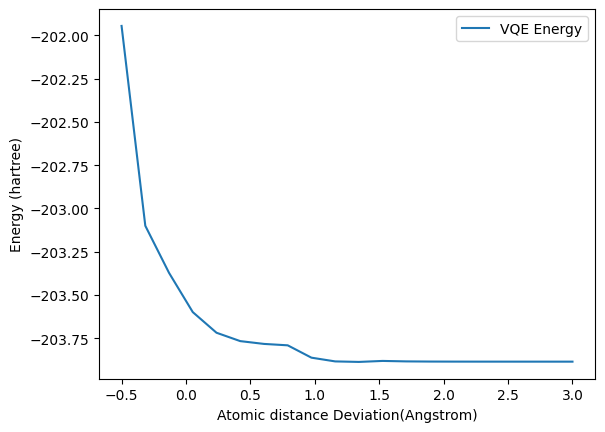

In [ ]:
perturbation_steps = np.linspace(-0.5, 3, 20) # 20 equally spaced points from -0.5 to 3, inclusive.
macro_fermionic_hamiltonian, macro_particle_num_particles, macro_particle_num_spin_orbitals, macro_qubit_op, macro_qubit_converter, macro_ground_state = \
                  solve_ground_state(M_info_dict, mapper_name="Parity",
                  num_electrons=2, num_spatial_orbitals=2,
                  two_qubit_reduction=True, z2symmetry_reduction="auto",  
                  name_solver='NumPy exact solver', solver=numpy_solver, pyqmc=False,
                  plot_bopes=True, perturbation_steps=perturbation_steps)

Figure 5.25 – Plot of the Born-Oppenheimer Potential Energy Surface (BOPES) of the macro molecule

# Summary


# Questions

1.   Does the variational theorem apply to excited states?


In [ ]:
#@title Enter your answer Yes, No or ? for a solution, then execute cell.
answer = "" #@param {type:"string"}
solution = "Yes"
if answer == solution:
  print("Correct")
elif answer == '?':
  print(solution)
else:
  print("Incorrect, please try again")

Incorrect, please try again


2. True or False: The Metropolis-Hastings method is a way to approximate integration over spatial coordinates.

In [ ]:
#@title Enter your answer True, False or ? for a solution, then execute cell.
answer = "" #@param {type:"string"}
solution = "True"
if answer == solution:
  print("Correct")
elif answer == '?':
  print(solution)
else:
  print("Incorrect, please try again")

Incorrect, please try again


3. True or False: VQE is only a quantum computing algorithm and does not require the use of classical computing.

In [ ]:
#@title Enter your answer True, False or ? for a solution, then execute cell.
answer = "" #@param {type:"string"}
solution = "False"
if answer == solution:
  print("Correct")
elif answer == '?':
  print(solution)
else:
  print("Incorrect, please try again")

Incorrect, please try again


In [ ]:
# Display Qiskit Software and System information
import qiskit.tools.jupyter
%qiskit_version_table